## **Import Library**

In [33]:
import kagglehub
import ipywidgets as widgets
from IPython.display import display
from tabulate import tabulate
import os

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.simplefilter("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import QuantileTransformer, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, precision_score, recall_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.model_selection import StratifiedKFold

## **Data Loading**

In [2]:
dataset_owner = "rabieelkharoua"
dataset_name = "alzheimers-disease-dataset"
dataset_version = "1"

# Expected path
expected_path = os.path.expanduser(f"~/.cache/kagglehub/datasets/{dataset_owner}/{dataset_name}/versions/{dataset_version}")

# Check if dataset already exists
if os.path.exists(expected_path):
    print(f"Dataset already exists at path: {expected_path}")
else:
    print("Dataset not found locally. Downloading...")
    path = kagglehub.dataset_download(f"{dataset_owner}/{dataset_name}")
    print(f"Path to dataset files: {path}")

Dataset already exists at path: /home/noir/.cache/kagglehub/datasets/rabieelkharoua/alzheimers-disease-dataset/versions/1


In [5]:
# Finding file csv in directory
csv_files = [f for f in os.listdir(expected_path) if f.endswith(".csv")]
csv_path = os.path.join(expected_path, csv_files[0])

dataset = pd.read_csv(csv_path)
dataset.head().T

,0,1,2,3,4
PatientID,4751,4752,4753,4754,4755
Age,73,89,73,74,89
Gender,0,0,0,1,0
Ethnicity,0,0,3,0,0
EducationLevel,2,0,1,1,0
BMI,22.927749,26.827681,17.795882,33.800817,20.716974
Smoking,0,0,0,1,0
AlcoholConsumption,13.297218,4.542524,19.555085,12.209266,18.454356
PhysicalActivity,6.327112,7.619885,7.844988,8.428001,6.310461
DietQuality,1.347214,0.518767,1.826335,7.435604,0.795498


## **Exploratory Data and Visualization Analysis**

In [6]:
print("\nDataset Duplicated:")
display(dataset.duplicated().sum())

print("\nDataset Information:")
dataset.info()

print("\nMissing Values per Column:")
for col in dataset.columns:
    print(f"{col:20} : {dataset[col].isna().sum()}")


Dataset Duplicated:


np.int64(0)


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                  

In [7]:
print("Statistics Results")
display(dataset.describe().T)

print("Statistics of all columns")
display(dataset.describe(include='all').T)

Statistics Results


,count,mean,std,min,25%,50%,75%,max
PatientID,2149.0,5825.000000,620.507185,4751.000000,5288.000000,5825.000000,6362.000000,6899.000000
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


Statistics of all columns


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PatientID,2149.0,NaN,NaN,NaN,5825.0,620.507185,4751.0,5288.0,5825.0,6362.0,6899.0
Age,2149.0,NaN,NaN,NaN,74.908795,8.990221,60.0,67.0,75.0,83.0,90.0
Gender,2149.0,NaN,NaN,NaN,0.506282,0.500077,0.0,0.0,1.0,1.0,1.0
Ethnicity,2149.0,NaN,NaN,NaN,0.697534,0.996128,0.0,0.0,0.0,1.0,3.0
EducationLevel,2149.0,NaN,NaN,NaN,1.286645,0.904527,0.0,1.0,1.0,2.0,3.0
BMI,2149.0,NaN,NaN,NaN,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,NaN,NaN,NaN,0.288506,0.453173,0.0,0.0,0.0,1.0,1.0
AlcoholConsumption,2149.0,NaN,NaN,NaN,10.039442,5.75791,0.002003,5.13981,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,NaN,NaN,NaN,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,NaN,NaN,NaN,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


In [8]:
explore_df = dataset.copy()
explore_df.head().T

,0,1,2,3,4
PatientID,4751,4752,4753,4754,4755
Age,73,89,73,74,89
Gender,0,0,0,1,0
Ethnicity,0,0,3,0,0
EducationLevel,2,0,1,1,0
BMI,22.927749,26.827681,17.795882,33.800817,20.716974
Smoking,0,0,0,1,0
AlcoholConsumption,13.297218,4.542524,19.555085,12.209266,18.454356
PhysicalActivity,6.327112,7.619885,7.844988,8.428001,6.310461
DietQuality,1.347214,0.518767,1.826335,7.435604,0.795498


In [9]:
# convert numerik binary columns to object
explore_df['Gender'] = explore_df['Gender'].astype(int)
explore_df['Ethnicity'] = explore_df['Ethnicity'].astype(int)
explore_df['EducationLevel'] = explore_df['EducationLevel'].astype(int)

gender_map = {0: 'Male', 1: 'Female'}
ethnicity_map = {0: 'Caucasian', 1: 'African American', 2: 'Asian', 3: 'Other'}
education_map = {0: 'None', 1: 'High School', 2: "Bachelor's", 3: 'Higher'}

explore_df['Gender'] = explore_df['Gender'].map(gender_map)
explore_df['Ethnicity'] = explore_df['Ethnicity'].map(ethnicity_map)
explore_df['EducationLevel'] = explore_df['EducationLevel'].map(education_map)

binary_cols = [
    'Smoking', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
    'Depression', 'HeadInjury', 'Hypertension', 'Confusion', 'Disorientation',
    'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness',
    'Diagnosis', 'MemoryComplaints', 'BehavioralProblems'
]

for col in binary_cols:
    explore_df[col] = explore_df[col].astype(int).map({0: 'No', 1: 'Yes'})

explore_df.head().T

,0,1,2,3,4
PatientID,4751,4752,4753,4754,4755
Age,73,89,73,74,89
Gender,Male,Male,Male,Female,Male
Ethnicity,Caucasian,Caucasian,Other,Caucasian,Caucasian
EducationLevel,Bachelor's,None,High School,High School,None
BMI,22.927749,26.827681,17.795882,33.800817,20.716974
Smoking,No,No,No,Yes,No
AlcoholConsumption,13.297218,4.542524,19.555085,12.209266,18.454356
PhysicalActivity,6.327112,7.619885,7.844988,8.428001,6.310461
DietQuality,1.347214,0.518767,1.826335,7.435604,0.795498


In [10]:
explore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   object 
 3   Ethnicity                  2149 non-null   object 
 4   EducationLevel             2149 non-null   object 
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   object 
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   object 
 12  CardiovascularDisease      2149 non-null   object 
 13  Diabetes                   2149 non-null   objec

In [11]:
numerical_columns = explore_df.select_dtypes(include=["int64", "float64"]).columns
categorical_columns = explore_df.select_dtypes(include=["object"]).columns

# Ubah ke dalam dataframe
numerical_df = pd.DataFrame(explore_df[numerical_columns])
categorical_df = pd.DataFrame(explore_df[categorical_columns])


**Histogram Distribution Numeric Variables**

<Figure size 1500x1000 with 0 Axes>

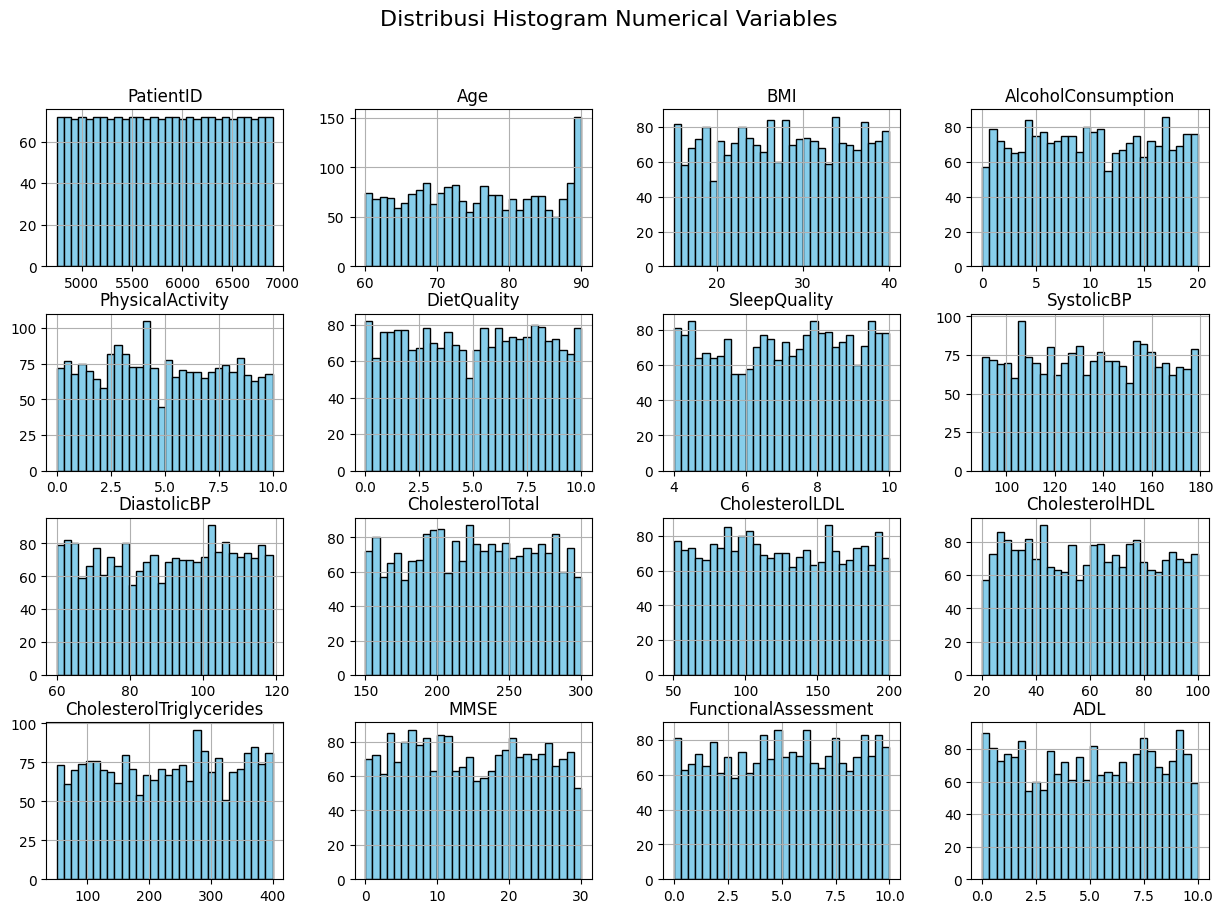

In [12]:
plt.figure(figsize=(15, 10))

# Histogram untuk distribusi visual numerik
explore_df.select_dtypes(include=["int64", "float64"]).hist(bins=30, figsize=(15, 10), color="skyblue", edgecolor="black")
plt.suptitle("Distribusi Histogram Numerical Variables", fontsize=16)
plt.show()

**Outlier Check**

PatientID: 0 outlier found
Age: 0 outlier found
BMI: 0 outlier found
AlcoholConsumption: 0 outlier found
PhysicalActivity: 0 outlier found
DietQuality: 0 outlier found
SleepQuality: 0 outlier found
SystolicBP: 0 outlier found
DiastolicBP: 0 outlier found
CholesterolTotal: 0 outlier found
CholesterolLDL: 0 outlier found
CholesterolHDL: 0 outlier found
CholesterolTriglycerides: 0 outlier found
MMSE: 0 outlier found
FunctionalAssessment: 0 outlier found
ADL: 0 outlier found


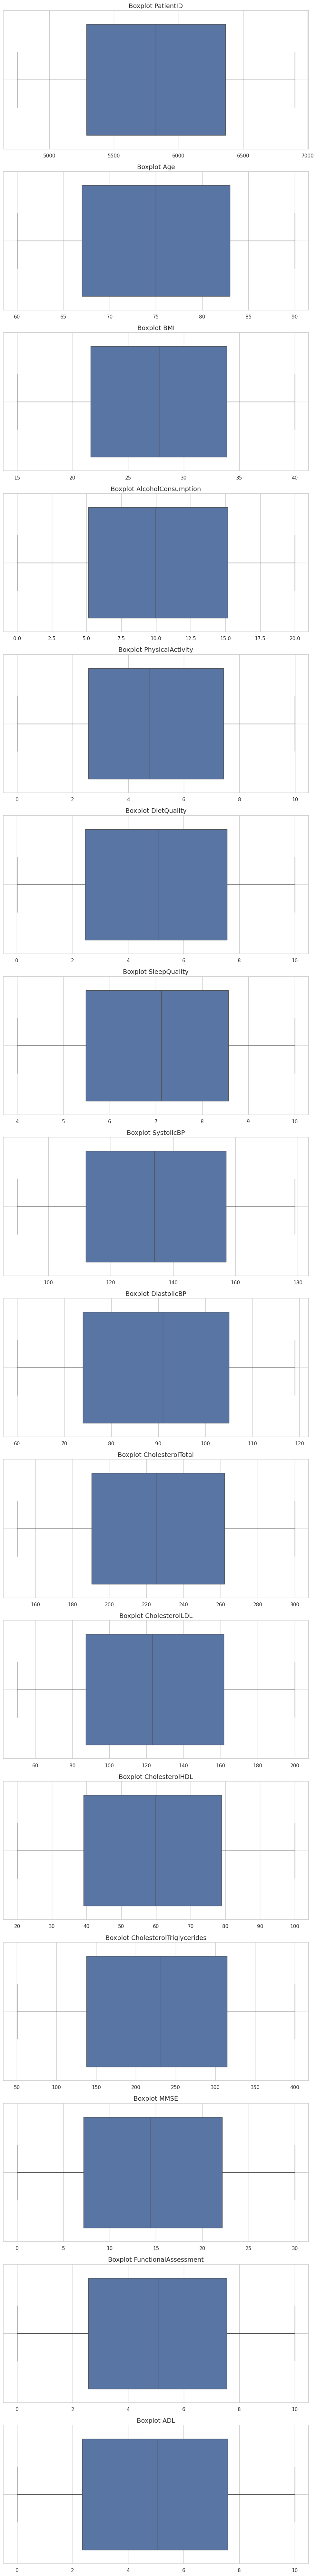

In [13]:
# Set style
sns.set(style="whitegrid")

# detect outlier with IQR methods
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

fig, axes = plt.subplots(nrows=len(numerical_columns), figsize=(10, 5 * len(numerical_columns)))

# Loop to build boxplot for each variables and print the number of outliers
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=dataset, x=col, ax=axes[i])
    axes[i].set_title(f"Boxplot {col}", fontsize=14)
    axes[i].set_xlabel("")
    axes[i].grid(True)
    
    # Outlier detection
    outliers = detect_outliers_iqr(dataset, col)
    print(f"{col}: {len(outliers)} outlier found")

plt.tight_layout()
plt.show()

**Exploratory Distribution Data**

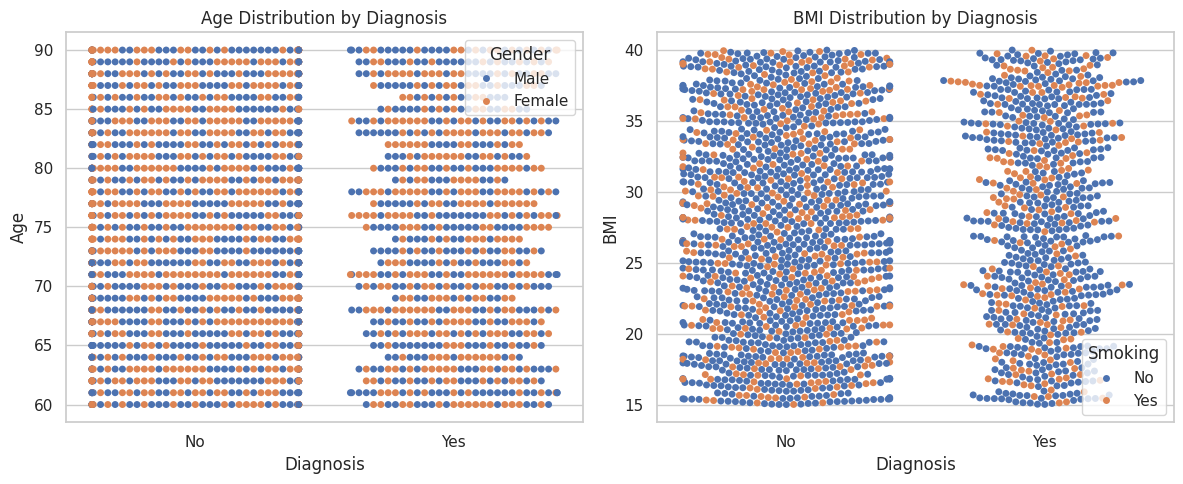

In [14]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.swarmplot(x='Diagnosis', y='Age', data=explore_df, hue='Gender')
plt.title('Age Distribution by Diagnosis')

plt.subplot(1, 2, 2)
sns.swarmplot(x='Diagnosis', y='BMI', data=explore_df, hue='Smoking')
plt.title('BMI Distribution by Diagnosis')

plt.tight_layout()
plt.show()

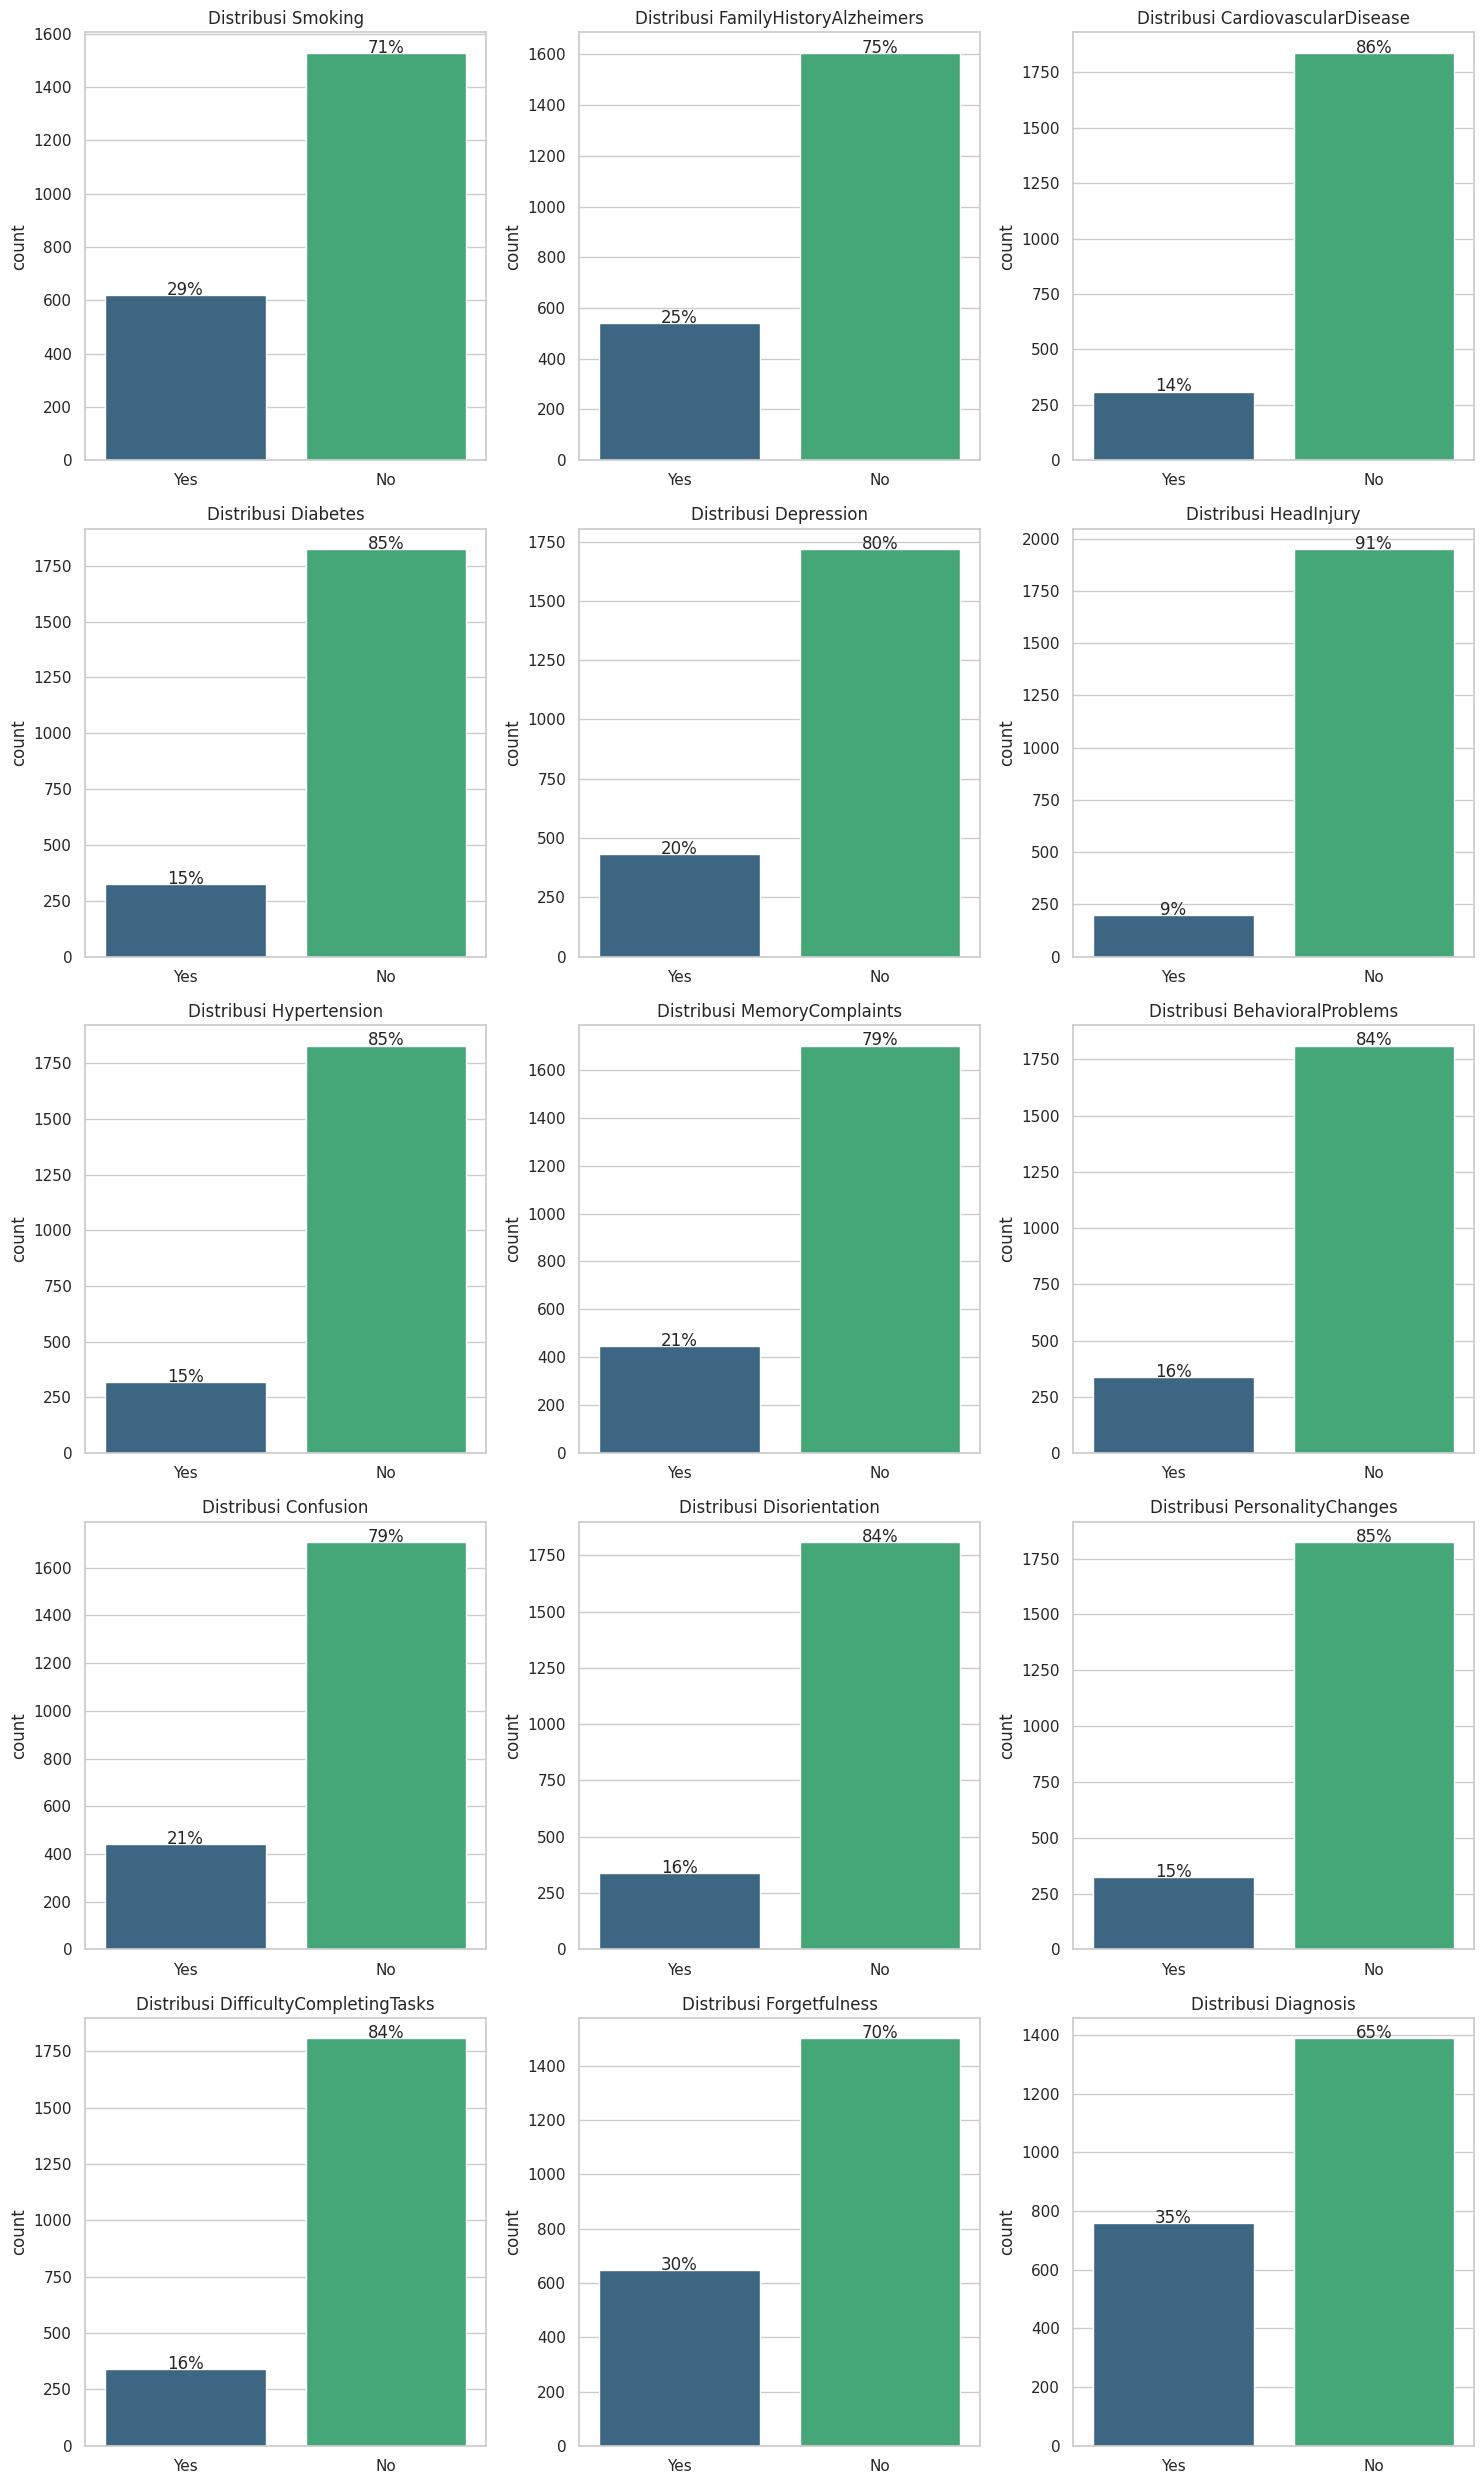

In [15]:
binary_cols = [col for col in explore_df.columns if explore_df[col].isin(['Yes','No']).all() and col != 'PatientID']

n_cols = len(binary_cols)
n_rows = (n_cols + 2) // 3
fixed_order = ['Yes', 'No']

plt.figure(figsize=(15, 5*n_rows))
for i, col in enumerate(binary_cols, 1):
    plt.subplot(n_rows, 3, i)
    sns.countplot(x=col, data=explore_df, palette='viridis', order=fixed_order)
    plt.title(f'Distribusi {col}')
    plt.xlabel('')
    
    # Tambahkan label persentase
    total = len(explore_df[col])
    for p in plt.gca().patches:
        height = p.get_height()
        plt.gca().text(p.get_x()+p.get_width()/2., height + 0.1, 
                       f'{height/total:.0%}', ha='center')
        
plt.tight_layout()
plt.show()

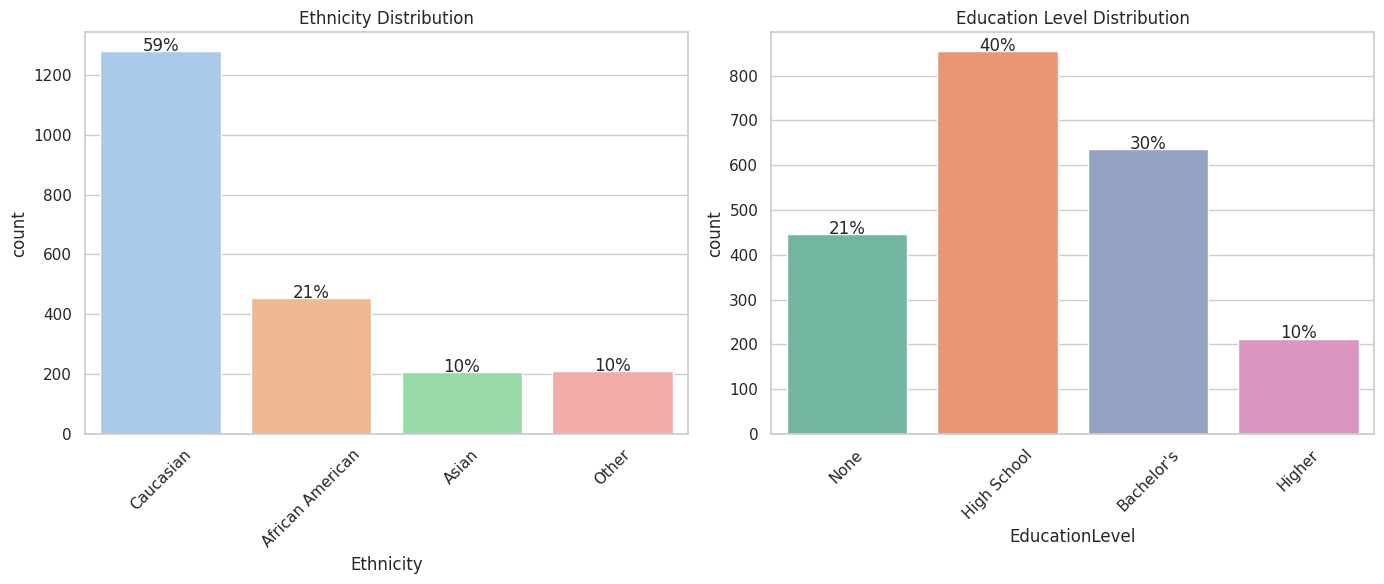

In [16]:
# Visualization
plt.figure(figsize=(14, 6))

# 1. Ethnicity
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='Ethnicity', data=explore_df, 
                   order=['Caucasian', 'African American', 'Asian', 'Other'],
                   palette='pastel')
plt.title('Ethnicity Distribution')
plt.xticks(rotation=45)

# add persentase label
total = len(explore_df)
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2., height+0.1, 
            f'{height/total:.0%}', ha='center')

# 2. EducationLevel
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x='EducationLevel', data=explore_df,
                   order=['None', 'High School', "Bachelor's", 'Higher'],
                   palette='Set2')
plt.title('Education Level Distribution')
plt.xticks(rotation=45)

# add persentase label
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2., height+0.1, 
            f'{height/total:.0%}', ha='center')

plt.tight_layout()
plt.show()

**Heatmap Correlation**

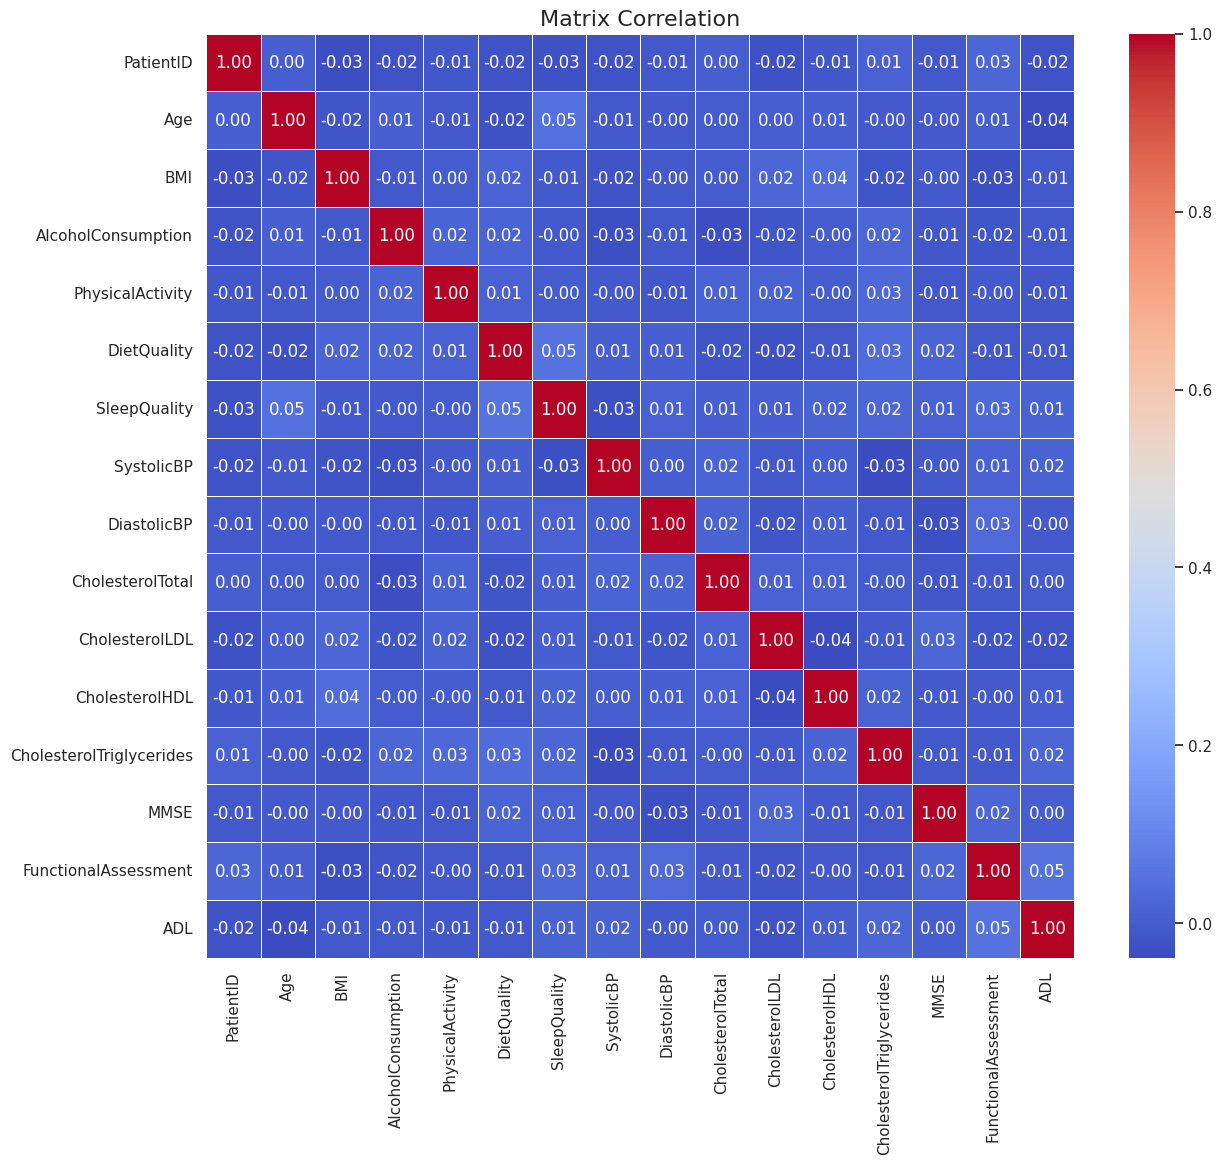

In [42]:
corr = numerical_df.corr()

# Plot heatmap 
plt.figure(figsize=(14, 12))
corr_matrix = numerical_df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matrix Correlation", fontsize=16)
plt.show()

## **Data Preparation**

In [18]:
modelling_df = dataset.copy()
modelling_df = modelling_df.drop(['PatientID','DoctorInCharge'], axis=1)
modelling_df.head().T

,0,1,2,3,4
Age,73.000000,89.000000,73.000000,74.000000,89.000000
Gender,0.000000,0.000000,0.000000,1.000000,0.000000
Ethnicity,0.000000,0.000000,3.000000,0.000000,0.000000
EducationLevel,2.000000,0.000000,1.000000,1.000000,0.000000
BMI,22.927749,26.827681,17.795882,33.800817,20.716974
Smoking,0.000000,0.000000,0.000000,1.000000,0.000000
AlcoholConsumption,13.297218,4.542524,19.555085,12.209266,18.454356
PhysicalActivity,6.327112,7.619885,7.844988,8.428001,6.310461
DietQuality,1.347214,0.518767,1.826335,7.435604,0.795498
SleepQuality,9.025679,7.151293,9.673574,8.392554,5.597238


**Data Splitting**

In [19]:
X = modelling_df.drop('Diagnosis', axis=1)
y = modelling_df['Diagnosis']

scaler = MinMaxScaler()
X_array = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_array, columns=X.columns)

quantile_transformer = QuantileTransformer(output_distribution='normal')
X_scaled = quantile_transformer.fit_transform(X_scaled)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

counter_sorted = dict(sorted(Counter(y).items()))
print("Class Distribution Before Undersampling:", counter_sorted)

Class Distribution Before Undersampling: {0: 1389, 1: 760}


In [21]:
undersample = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)
counter_sorted = dict(sorted(Counter(y_train_under).items()))

print("Class Distribution After Undersampling:", counter_sorted)

Class Distribution After Undersampling: {0: 607, 1: 607}


## **Model Development**

In [22]:
dt = DecisionTreeClassifier().fit(X_train_under, y_train_under)
rf = RandomForestClassifier().fit(X_train_under, y_train_under)
nb = GaussianNB().fit(X_train_under, y_train_under)

## **Model Evaluation**

In [23]:
# Decision Tree 
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt) 
precision_dt = precision_score(y_test, y_pred_dt, average='macro')
recall_dt = recall_score(y_test, y_pred_dt, average='macro')
f1_dt = f1_score(y_test, y_pred_dt, average='macro')

# Random Forest 
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='macro')  
recall_rf = recall_score(y_test, y_pred_rf, average='macro')
f1_rf = f1_score(y_test, y_pred_rf, average='macro')

# Naive Bayes   
y_pred_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='macro')
recall_nb = recall_score(y_test, y_pred_nb, average='macro')
f1_nb = f1_score(y_test, y_pred_nb, average='macro')



In [ ]:
# Dataframe from evaluation
models = ["Decision Tree", "Random Forest", "Naive Bayes"]
accuracy = [accuracy_dt, accuracy_rf, accuracy_nb]
precision = [precision_dt, precision_rf, precision_nb]
recall = [recall_dt, recall_rf, recall_nb]
f1_score_values = [f1_dt, f1_rf, f1_nb]

# model and predicition
models = ["Decision Tree", "Random Forest", "Naive Bayes"]
predictions = [y_pred_dt, y_pred_rf, y_pred_nb]
true_values = y_test

# Metrics evaluation
accuracy = [accuracy_score(true_values, pred) for pred in predictions]
precision = [precision_score(true_values, pred, average='macro') for pred in predictions]
recall = [recall_score(true_values, pred, average='macro') for pred in predictions]
f1_score_values = [f1_score(true_values, pred, average='macro') for pred in predictions]

class_reports = [classification_report(true_values, pred, output_dict=True) for pred in predictions]

# convert Classification Report to DataFrame
report_dfs = [pd.DataFrame(report).transpose() for report in class_reports]

# build dataframe
eval_df = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1_score_values
})

print("📌 Metric Evaluation Before Tuning:\n")
print(eval_df.to_markdown(index=False))

📌 Metric Evaluation Before Tuning:

| Model         |   Accuracy |   Precision |   Recall |   F1 Score |
|:--------------|-----------:|------------:|---------:|-----------:|
| Decision Tree |   0.888372 |    0.874674 | 0.889951 |   0.880856 |
| Random Forest |   0.951163 |    0.948571 | 0.944539 |   0.946496 |
| Naive Bayes   |   0.788372 |    0.769743 | 0.780149 |   0.77384  |


In [25]:
print("📌 Classification Report Before Tuning:\n")
for model_name, report_df in zip(models, report_dfs):
    print(f"\n📌 Classification Report - {model_name}:\n")
    print(report_df.to_markdown())

📌 Classification Report Before Tuning:


📌 Classification Report - Decision Tree:

|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.938697 | 0.884477 |   0.910781 | 277        |
| 1            |    0.810651 | 0.895425 |   0.850932 | 153        |
| accuracy     |    0.888372 | 0.888372 |   0.888372 |   0.888372 |
| macro avg    |    0.874674 | 0.889951 |   0.880856 | 430        |
| weighted avg |    0.893137 | 0.888372 |   0.889486 | 430        |

📌 Classification Report - Random Forest:

|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.957143 | 0.967509 |   0.962298 | 277        |
| 1            |    0.94     | 0.921569 |   0.930693 | 153        |
| accuracy     |    0.951163 | 0.951163 |   0.951163 |   0.951163 |
| macro avg    |    0.948571 | 0.944539 |   0.946496 | 430

## **Hyperparameter Tuning**

**Bayesian Optimization**

In [27]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# dt tuning
dt_params = {
    'max_depth': Integer(1, 50),          
    'min_samples_split': Integer(2, 20),   
    'criterion': Categorical(['gini', 'entropy']),  
}

dt_ori = DecisionTreeClassifier()
dt_bayes = BayesSearchCV(
    estimator=dt_ori,
    search_spaces=dt_params,
    scoring='accuracy', 
    cv=cv,
    n_iter=50,           
    n_jobs=-1,           
    random_state=42
)
dt_bayes.fit(X_train_under, y_train_under)

# rf tuning
rf_params = {
    'n_estimators': Integer(10, 1000),    
    'max_depth': Integer(1, 50),          
    'min_samples_split': Integer(2, 20),   
    'criterion': Categorical(['gini', 'entropy']),  
}

rf_ori = RandomForestClassifier()
rf_bayes = BayesSearchCV(
    estimator=rf_ori,
    search_spaces=rf_params,
    scoring='accuracy', 
    cv=cv,
    n_iter=50,           
    n_jobs=-1,           
    random_state=42
)
rf_bayes.fit(X_train_under, y_train_under)

# nb tuning
nb_params = {
    'var_smoothing': Real(1e-9, 1e-1, prior='log-uniform')  # Smoothing untuk stabilitas numerik
}

nb_ori = GaussianNB()
nb_bayes = BayesSearchCV(
    estimator=nb_ori,
    search_spaces=nb_params,
    scoring='accuracy',
    cv=cv,
    n_iter=20,  # Lebih sedikit karena parameternya sederhana
    n_jobs=-1,
    random_state=42
)
nb_bayes.fit(X_train_under, y_train_under)

print("Decision Tree Best Params:", dt_bayes.best_params_)
print("Random Forest Best Params:", rf_bayes.best_params_)
print("Naive Bayes Best Params:", nb_bayes.best_params_)

Decision Tree Best Params: OrderedDict([('criterion', 'entropy'), ('max_depth', 7), ('min_samples_split', 20)])
Random Forest Best Params: OrderedDict([('criterion', 'entropy'), ('max_depth', 32), ('min_samples_split', 20), ('n_estimators', 1000)])
Naive Bayes Best Params: OrderedDict([('var_smoothing', 1.9091131576909445e-06)])


In [28]:
# Fungsi untuk mengevaluasi model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    return accuracy, precision, recall, f1

# Evaluasi semua model
models_tuned = {
    "Decision Tree (Tuned)": dt_bayes,
    "Random Forest (Tuned)": rf_bayes,
    "Naive Bayes (Tuned)": nb_bayes
}

results = []
for name, model in models_tuned.items():
    acc, prec, rec, f1 = evaluate_model(model, X_test, y_test)
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

# Tampilkan hasil dalam tabel
results_df = pd.DataFrame(results)
print(results_df.to_markdown(index=False))

| Model                 |   Accuracy |   Precision |   Recall |   F1 Score |
|:----------------------|-----------:|------------:|---------:|-----------:|
| Decision Tree (Tuned) |   0.92093  |    0.912018 | 0.916684 |   0.914252 |
| Random Forest (Tuned) |   0.953488 |    0.950485 | 0.947807 |   0.94912  |
| Naive Bayes (Tuned)   |   0.788372 |    0.769743 | 0.780149 |   0.77384  |


**Classification Reports**

In [29]:
def print_classification_reports(models_dict, X_test, y_test):
    for name, model in models_dict.items():
        y_pred = model.predict(X_test)
        report = classification_report(y_test, y_pred, output_dict=True)
        report_df = pd.DataFrame(report).transpose()
        
        # Format support as integer
        report_df['support'] = report_df['support'].apply(lambda x: int(x) if isinstance(x, (int, float)) else x)
        
        print(f"\n📌 Classification Report - {name}:\n")
        print(report_df[['precision', 'recall', 'f1-score', 'support']].to_markdown(floatfmt=".6f"))

# Panggil fungsi untuk menampilkan report
print("📌 Classification Report After Tuning:\n")
print_classification_reports(models_tuned, X_test, y_test)

📌 Classification Report After Tuning:


📌 Classification Report - Decision Tree (Tuned):

|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.945055 | 0.931408 |   0.938182 | 277.000000 |
| 1            |    0.878981 | 0.901961 |   0.890323 | 153.000000 |
| accuracy     |    0.920930 | 0.920930 |   0.920930 |   0.000000 |
| macro avg    |    0.912018 | 0.916684 |   0.914252 | 430.000000 |
| weighted avg |    0.921545 | 0.920930 |   0.921153 | 430.000000 |

📌 Classification Report - Random Forest (Tuned):

|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.960573 | 0.967509 |   0.964029 | 277.000000 |
| 1            |    0.940397 | 0.928105 |   0.934211 | 153.000000 |
| accuracy     |    0.953488 | 0.953488 |   0.953488 |   0.000000 |
| macro avg    |    0.950485 | 0.947807 |  

## **Comparison Before & After Tuning**

In [31]:
# Before tuning data
before_tuning = {
    'Accuracy': [accuracy_dt, accuracy_rf, accuracy_nb],
    'Precision': [precision_dt, precision_rf, precision_nb],
    'Recall': [recall_dt, recall_rf, recall_nb],
    'F1 Score': [f1_dt, f1_rf, f1_nb]
}

# After tuning data
after_tuning = {
    'Accuracy': [results[0]['Accuracy'], results[1]['Accuracy'], results[2]['Accuracy']],
    'Precision': [results[0]['Precision'], results[1]['Precision'], results[2]['Precision']],
    'Recall': [results[0]['Recall'], results[1]['Recall'], results[2]['Recall']],
    'F1 Score': [results[0]['F1 Score'], results[1]['F1 Score'], results[2]['F1 Score']]
}

In [35]:
comparison_data = []
for i, model in enumerate(models):
    comparison_data.append({
        'Model': model,
        'Accuracy_Before': before_tuning['Accuracy'][i],
        'Accuracy_After': after_tuning['Accuracy'][i],
        'Accuracy_Improvement': f"{(after_tuning['Accuracy'][i]-before_tuning['Accuracy'][i])/before_tuning['Accuracy'][i]*100:.2f}%",
        'Precision_Before': before_tuning['Precision'][i],
        'Precision_After': after_tuning['Precision'][i],
        'Precision_Improvement': f"{(after_tuning['Precision'][i]-before_tuning['Precision'][i])/before_tuning['Precision'][i]*100:.2f}%",
        'Recall_Before': before_tuning['Recall'][i],
        'Recall_After': after_tuning['Recall'][i],
        'Recall_Improvement': f"{(after_tuning['Recall'][i]-before_tuning['Recall'][i])/before_tuning['Recall'][i]*100:.2f}%",
        'F1_Before': before_tuning['F1 Score'][i],
        'F1_After': after_tuning['F1 Score'][i],
        'F1_Improvement': f"{(after_tuning['F1 Score'][i]-before_tuning['F1 Score'][i])/before_tuning['F1 Score'][i]*100:.2f}%"
    })

comparison_df = pd.DataFrame(comparison_data)

print("📊 Comparison Model Before & After Tuning")
print(comparison_df.to_markdown(index=False))

📊 Comparison Model Before & After Tuning
| Model         |   Accuracy_Before |   Accuracy_After | Accuracy_Improvement   |   Precision_Before |   Precision_After | Precision_Improvement   |   Recall_Before |   Recall_After | Recall_Improvement   |   F1_Before |   F1_After | F1_Improvement   |
|:--------------|------------------:|-----------------:|:-----------------------|-------------------:|------------------:|:------------------------|----------------:|---------------:|:---------------------|------------:|-----------:|:-----------------|
| Decision Tree |          0.888372 |         0.92093  | 3.66%                  |           0.874674 |          0.912018 | 4.27%                   |        0.889951 |       0.916684 | 3.00%                |    0.880856 |   0.914252 | 3.79%            |
| Random Forest |          0.951163 |         0.953488 | 0.24%                  |           0.948571 |          0.950485 | 0.20%                   |        0.944539 |       0.947807 | 0.35%           

## **Confussion Matrix**

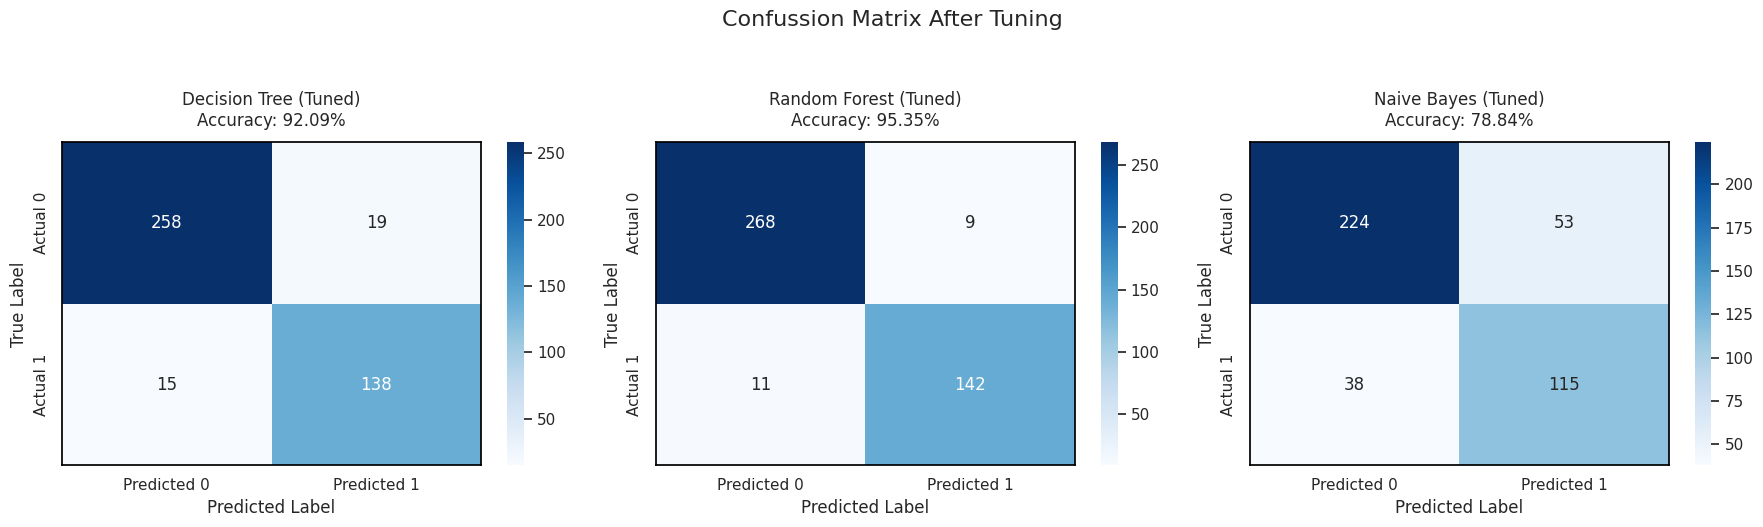

In [ ]:
def plot_confussion_matrix(models_tuned, X_test, y_test):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle('Confussion Matrix After Tuning', fontsize=16, y=1.05)
    
    for (model_name, model), ax in zip(models_tuned.items(), axes):
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        
        # Heatmap 
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=['Predicted 0', 'Predicted 1'],
                    yticklabels=['Actual 0', 'Actual 1'],
                    ax=ax)
        
        ax.set_title(f'{model_name}\nAccuracy: {accuracy_score(y_test, y_pred):.2%}', pad=12)
        ax.set_xlabel('Predicted Label', fontsize=12)
        ax.set_ylabel('True Label', fontsize=12)
        
        # add spine
        for _, spine in ax.spines.items():
            spine.set_visible(True)
            spine.set_color('black')
    
    plt.tight_layout()
    plt.show()

# Panggil fungsi
plot_confussion_matrix(models_tuned, X_test, y_test)

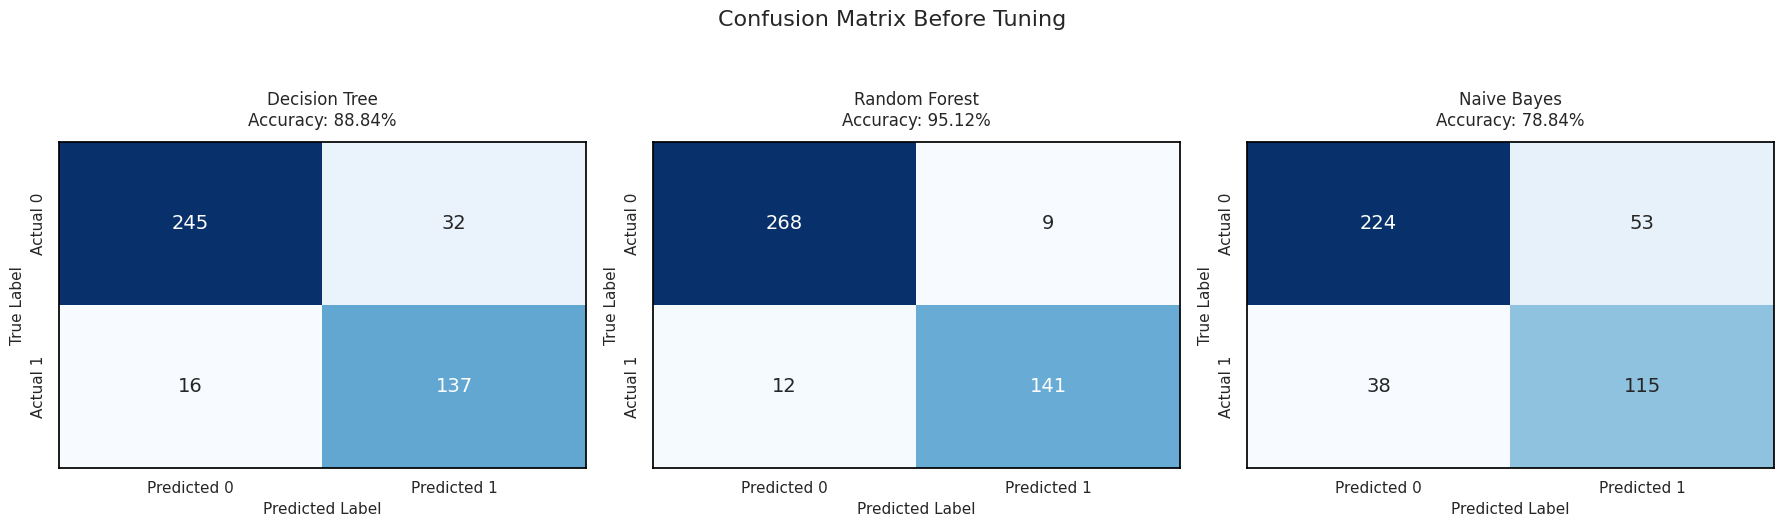

In [41]:
def plot_confusion_matrix(predictions, true_values, model_names):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle('Confusion Matrix Before Tuning', fontsize=16, y=1.05)
    
    for pred, name, ax in zip(predictions, model_names, axes):
        cm = confusion_matrix(true_values, pred)
        
        # Create heatmap
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    cbar=False, annot_kws={'size': 14},
                    xticklabels=['Predicted 0', 'Predicted 1'],
                    yticklabels=['Actual 0', 'Actual 1'],
                    ax=ax)
        
        # Calculate and display accuracy
        acc = accuracy_score(true_values, pred)
        ax.set_title(f'{name}\nAccuracy: {acc:.2%}', pad=12, fontsize=12)
        
        # Axis labels
        ax.set_xlabel('Predicted Label', fontsize=11)
        ax.set_ylabel('True Label', fontsize=11)
        
        # Add borders
        for _, spine in ax.spines.items():
            spine.set_visible(True)
            spine.set_color('black')
    
    plt.tight_layout()
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(predictions, true_values, models)

## **Feature Importance**

In [52]:
best_rfModel = rf_bayes.best_estimator_
feature_importance = best_rfModel.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

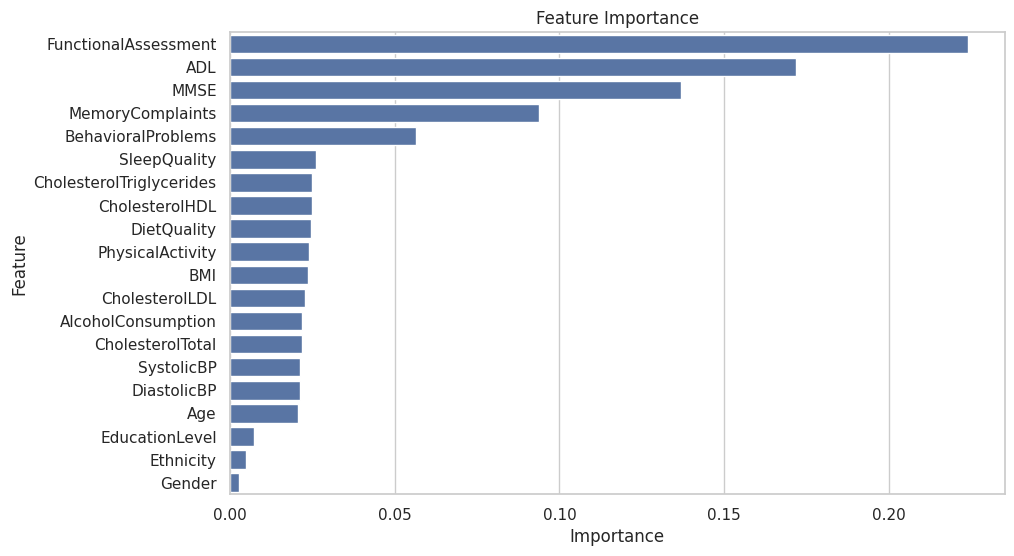

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
plt.title('Feature Importance')
plt.show()